In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r'C:\Users\smorr\Downloads\visits.txt', parse_dates = [1])
df.head()

,user_id,visit_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00


In [3]:
# Creating a function to classify each visit time

def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return 'Afternoon'
    elif (x > 16) and (x <= 20):
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return 'Night'
    elif (x <= 4):
        return 'Late Night'

In [4]:
# Making Date and Time columns
df["visit_time"] = df["visit_time"].astype("str")
df["visit_time"] = df["visit_time"].str.split(" ")
df["Date"] = df["visit_time"].str.get(0)
df["Time"] = df["visit_time"].str.get(1)
del df["visit_time"]

# Making Hour column to identify session
df['Hour'] = df['Time'].str.split(':').str.get(0).astype(int)

# Applying the time_group function to the nearly created Hour column 
df["Period"] = df["Hour"].apply(f)

# Dropping newly created columns that are no longer needed
df = df.drop(columns = ["Hour"])


In [5]:
df.head()

,user_id,Date,Time,Period
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07,15:14:00,Afternoon
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26,14:24:00,Afternoon
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20,08:23:00,Early Morning
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04,18:15:00,Evening
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27,11:25:00,Morning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2000 non-null   object
 1   Date     2000 non-null   object
 2   Time     2000 non-null   object
 3   Period   2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


In [7]:
# Top 10 dates with most visits
top_visits = df["Date"].value_counts().to_frame().reset_index()
top_visits.columns = ["Date", "Visits"]
top_visits.head(10)

,Date,Visits
0,2017-02-14,15
1,2017-08-09,14
2,2017-01-06,14
3,2017-09-22,14
4,2017-11-21,13
5,2017-11-17,13
6,2017-06-27,13
7,2017-09-27,13
8,2017-05-27,13
9,2017-05-12,12


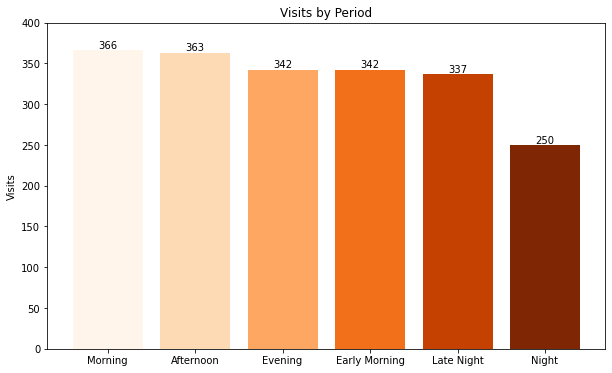

In [8]:
# Importing numpy to order the column scheme
import numpy as np

# Creating visual for visits by Period

period_visits = df["Period"].value_counts().reset_index()
period_visits.columns = ["Period", "Visits"]

# Create a bar chart
plt.figure(figsize=(10, 6))

#custom colours for the bars
n = len(period_visits["Period"])
colors = plt.cm.get_cmap('Oranges', n)

bars = plt.bar(
    period_visits["Period"],
    period_visits["Visits"],
    color=colors(np.arange(n))
)
#plt.xlabel("Period")
plt.ylabel("Visits")
plt.title("Visits by Period")
#plt.xticks(rotation=0)  

for i, v in enumerate(period_visits["Visits"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Extending the Y-Axis to 400 instead of 350
plt.ylim(0, 400)

plt.show()


Analysing Cart Data

In [9]:
cart = pd.read_csv(r'C:\Users\smorr\Downloads\cart.txt', parse_dates = [1])
cart.head()

,user_id,cart_time
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27 01:35:00
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04 10:38:00
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27 08:22:00
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26 15:48:00


In [10]:
# Making Date and Time columns
cart["cart_time"] = cart["cart_time"].astype("str")
cart["cart_time"] = cart["cart_time"].str.split(" ")
cart["Date"] = cart["cart_time"].str.get(0)
cart["Time"] = cart["cart_time"].str.get(1)
del cart["cart_time"]

# Making Hour column to identify session
cart['Hour'] = cart['Time'].str.split(':').str.get(0).astype(int)

# Applying the time_group function to the nearly created Hour column 
cart["Period"] = cart["Hour"].apply(f)

# Dropping newly created columns that are no longer needed
cart = cart.drop(columns = ["Hour"])

In [11]:
cart.head()

,user_id,Date,Time,Period
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07,20:45:00,Evening
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27,01:35:00,Late Night
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04,10:38:00,Morning
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27,08:22:00,Early Morning
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26,15:48:00,Afternoon


In [12]:
cart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  400 non-null    object
 1   Date     400 non-null    object
 2   Time     400 non-null    object
 3   Period   400 non-null    object
dtypes: object(4)
memory usage: 12.6+ KB


In [13]:
# Most visits to cart by date
cartv = cart["Date"].value_counts().to_frame().reset_index()
cartv.columns = ["Date", "Visits"]
cartv.head(10)

,Date,Visits
0,2017-05-12,6
1,2017-01-26,6
2,2017-11-20,6
3,2017-10-12,5
4,2017-11-21,5
5,2017-03-17,5
6,2017-08-09,5
7,2017-07-13,5
8,2017-01-05,5
9,2017-04-26,5


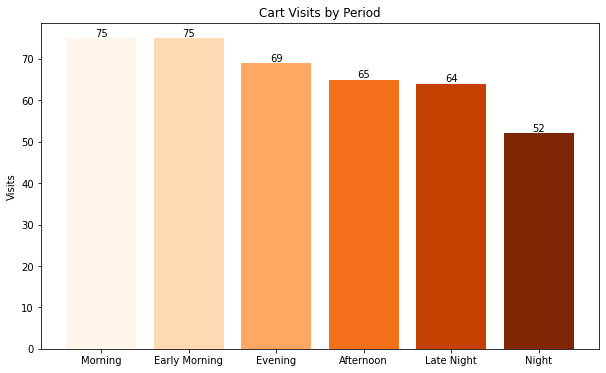

In [14]:
# Creating visual for visits to cart by Period

cart_visits = cart["Period"].value_counts().reset_index()
cart_visits.columns = ["Period", "Cart"]
cart

# Create a bar chart
plt.figure(figsize=(10, 6))

#custom colours for the bars
n = len(cart_visits["Period"])
colors = plt.cm.get_cmap('Oranges', n)

bars = plt.bar(
    cart_visits["Period"],
    cart_visits["Cart"],
    color=colors(np.arange(n))
)
#plt.xlabel("Period")
plt.ylabel("Visits")
plt.title("Cart Visits by Period")

# annotating the bars with the totals
for i, v in enumerate(cart_visits["Cart"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Analysing Checkout Data

In [15]:
ch = pd.read_csv(r'C:\Users\smorr\Downloads\checkout.txt', parse_dates = [1])
ch.head()

,user_id,checkout_time
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00
1,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07 20:11:00
2,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13 11:38:00
3,89fe330a-8966-4756-8f7c-3bdbcd47279a,2017-04-20 16:15:00
4,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:52:00


In [16]:
# Making Date and Time columns
ch["checkout_time"] = ch["checkout_time"].astype("str")
ch["checkout_time"] = ch["checkout_time"].str.split(" ")
ch["Date"] = ch["checkout_time"].str.get(0)
ch["Time"] = ch["checkout_time"].str.get(1)
del ch["checkout_time"]

# Making Hour column to identify session
ch['Hour'] = ch['Time'].str.split(':').str.get(0).astype(int)

# Applying the time_group function to the nearly created Hour column 
ch["Period"] = ch["Hour"].apply(f)

# Dropping newly created columns that are no longer needed
ch = ch.drop(columns = ["Hour"])

In [17]:
ch.head()

,user_id,Date,Time,Period
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25,09:29:00,Morning
1,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07,20:11:00,Evening
2,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13,11:38:00,Morning
3,89fe330a-8966-4756-8f7c-3bdbcd47279a,2017-04-20,16:15:00,Afternoon
4,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08,20:52:00,Evening


In [18]:
# Most visits to checkout by date
chd = ch["Date"].value_counts().to_frame().reset_index()
chd.columns = ["Date", "Checkout"]
chd.head(10)

,Date,Checkout
0,2017-03-17,8
1,2017-06-25,7
2,2017-11-20,6
3,2017-07-22,6
4,2017-09-05,6
5,2017-01-05,6
6,2017-08-09,6
7,2017-10-12,6
8,2017-08-17,5
9,2017-10-07,5


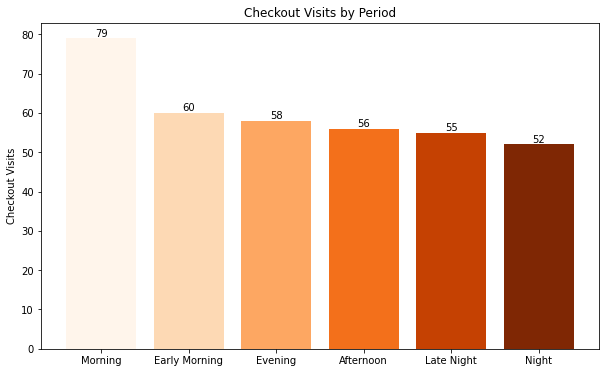

In [19]:
# Creating a visual for Checkout Visits by Date
checkout_visits = ch["Period"].value_counts().reset_index()
checkout_visits.columns = ["Period", "Checkout"]
checkout_visits.head()

# Create a bar chart
plt.figure(figsize=(10, 6))

#custom colours for the bars
n = len(checkout_visits["Period"])
colors = plt.cm.get_cmap('Oranges', n)

bars = plt.bar(
    checkout_visits["Period"],
    checkout_visits["Checkout"],
    color=colors(np.arange(n))
)
#plt.xlabel("Period")
plt.ylabel("Checkout Visits")
plt.title("Checkout Visits by Period")

# annotating the bars with the totals
for i, v in enumerate(checkout_visits["Checkout"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Analysing Purchase Data

In [20]:
p = pd.read_csv(r'C:\Users\smorr\Downloads\purchase.txt', parse_dates = [1])
p.head()

,user_id,purchase_time
0,4b44ace4-2721-47a0-b24b-15fbfa2abf85,2017-05-11 04:25:00
1,02e684ae-a448-408f-a9ff-dcb4a5c99aac,2017-09-05 08:45:00
2,4b4bc391-749e-4b90-ab8f-4f6e3c84d6dc,2017-11-20 20:49:00
3,a5dbb25f-3c36-4103-9030-9f7c6241cd8d,2017-01-22 15:18:00
4,46a3186d-7f5a-4ab9-87af-84d05bfd4867,2017-06-11 11:32:00


In [21]:
# Making Date and Time columns
p["purchase_time"] = p["purchase_time"].astype("str")
p["purchase_time"] = p["purchase_time"].str.split(" ")
p["Date"] = p["purchase_time"].str.get(0)
p["Time"] = p["purchase_time"].str.get(1)
del p["purchase_time"]

# Making Hour column to identify session
p['Hour'] = p['Time'].str.split(':').str.get(0).astype(int)

# Applying the time_group function to the nearly created Hour column 
p["Period"] = p["Hour"].apply(f)

# Dropping newly created columns that are no longer needed
p = p.drop(columns = ["Hour"])

In [22]:
p.head()

,user_id,Date,Time,Period
0,4b44ace4-2721-47a0-b24b-15fbfa2abf85,2017-05-11,04:25:00,Late Night
1,02e684ae-a448-408f-a9ff-dcb4a5c99aac,2017-09-05,08:45:00,Early Morning
2,4b4bc391-749e-4b90-ab8f-4f6e3c84d6dc,2017-11-20,20:49:00,Evening
3,a5dbb25f-3c36-4103-9030-9f7c6241cd8d,2017-01-22,15:18:00,Afternoon
4,46a3186d-7f5a-4ab9-87af-84d05bfd4867,2017-06-11,11:32:00,Morning


In [23]:
# Most purchases by date
pd = p["Date"].value_counts().to_frame().reset_index()
pd.columns = ["Date", "Purchases"]
pd.head(10)

,Date,Purchases
0,2017-06-25,9
1,2017-01-11,7
2,2017-10-12,6
3,2017-09-15,5
4,2017-05-02,5
5,2017-08-09,5
6,2017-11-24,4
7,2017-02-26,4
8,2017-03-26,4
9,2017-11-22,4


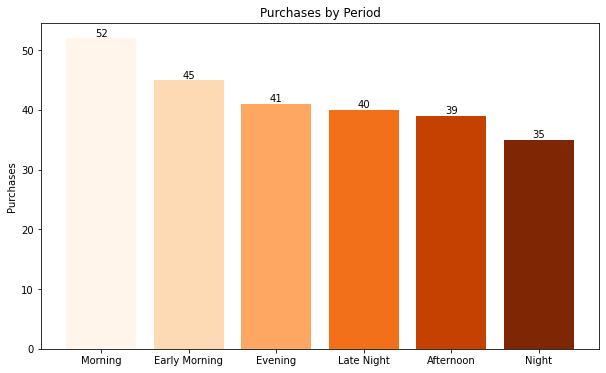

In [24]:
# Creating a visual for Purhases by Date
purchases = p["Period"].value_counts().reset_index()
purchases.columns = ["Period", "Purchases"]
purchases.head()

# Create a bar chart
plt.figure(figsize=(10, 6))

#custom colours for the bars
n = len(purchases["Period"])
colors = plt.cm.get_cmap('Oranges', n)

bars = plt.bar(
    purchases["Period"],
    purchases["Purchases"],
    color=colors(np.arange(n))
)
#plt.xlabel("Period")
plt.ylabel("Purchases")
plt.title("Purchases by Period")

# annotating the bars with the totals
for i, v in enumerate(purchases["Purchases"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Merging visit and cart data 

In [25]:
df.head()

,user_id,Date,Time,Period
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07,15:14:00,Afternoon
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26,14:24:00,Afternoon
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20,08:23:00,Early Morning
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04,18:15:00,Evening
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27,11:25:00,Morning


In [26]:
cart.head()

,user_id,Date,Time,Period
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07,20:45:00,Evening
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27,01:35:00,Late Night
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04,10:38:00,Morning
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27,08:22:00,Early Morning
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26,15:48:00,Afternoon


In [27]:
# Check the data type of the 'user_id' column in df
user_id_dtype_df = df["user_id"].dtype

# Check the data type of the 'user_id' column in cart
user_id_dtype_cart = cart["user_id"].dtype

print("Data type of 'user_id' column in df:", user_id_dtype_df)
print("Data type of 'user_id' column in cart:", user_id_dtype_cart)

Data type of 'user_id' column in df: object
Data type of 'user_id' column in cart: object


In [28]:
# Merging visits with cart 
merge_df = df.merge(cart, on='user_id', how='left')
merge_df

,user_id,Date_x,Time_x,Period_x,Date_y,Time_y,Period_y
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07,15:14:00,Afternoon,NaN,NaN,NaN
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26,14:24:00,Afternoon,2017-01-26,14:44:00,Afternoon
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20,08:23:00,Early Morning,2017-08-20,08:31:00,Early Morning
3,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20,08:23:00,Early Morning,2017-08-20,08:49:00,Early Morning
4,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04,18:15:00,Evening,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2047,33913ac2-03da-45ae-8fc3-fea39df827c6,2017-03-25,03:29:00,Late Night,NaN,NaN,NaN
2048,4f850132-b99d-4623-80e6-6e61d003577e,2017-01-08,09:57:00,Morning,NaN,NaN,NaN
2049,f0830b9b-1f5c-4e74-b63d-3f847cc6ce70,2017-09-07,12:56:00,Morning,NaN,NaN,NaN
2050,b01bffa7-63ba-4cd3-9d93-eb1477c23831,2017-07-20,04:37:00,Late Night,NaN,NaN,NaN


In [29]:
# customers who visited the website but not the shopping cart
vnc = merge_df[merge_df["Time_y"].isnull()]
vnc.head()

,user_id,Date_x,Time_x,Period_x,Date_y,Time_y,Period_y
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07,15:14:00,Afternoon,NaN,NaN,NaN
4,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04,18:15:00,Evening,NaN,NaN,NaN
5,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27,11:25:00,Morning,NaN,NaN,NaN
6,7bc62113-d51d-4e6b-85e0-1cf29e3de74a,2017-06-03,20:05:00,Evening,NaN,NaN,NaN
7,6f22cd44-bc63-4449-a9af-2651859da2f9,2017-03-18,23:09:00,Night,NaN,NaN,NaN


In [30]:
print("The number of customers who visit the website but not the shopping cart :", len(vnc))

The number of customers who visit the website but not the shopping cart : 1652


In [31]:
print("Total visits + cart:", len(merge_df))

Total visits + cart: 2052


In [32]:
# Got to Cart
gtc = len(merge_df) - len(vnc)
print("Customers who go to cart:", gtc)

Customers who go to cart: 400


In [34]:
percentage = len(vnc) / len(merge_df) * 100
rounded_percentage = round(percentage, 2)
percentage_string = str(rounded_percentage) + "%"
print("Percentage of people who go from the website page to cart:", percentage_string)

Percentage of people who go from the website page to cart: 80.51%


merging cart and checkout

In [35]:
cart_ch = cart.merge(ch, on='user_id', how='left')
cart_ch

,user_id,Date_x,Time_x,Period_x,Date_y,Time_y,Period_y
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07,20:45:00,Evening,2017-11-07,21:14:00,Night
1,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07,20:45:00,Evening,2017-11-07,20:50:00,Evening
2,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07,20:45:00,Evening,2017-11-07,21:11:00,Night
3,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27,01:35:00,Late Night,NaN,NaN,NaN
4,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04,10:38:00,Morning,2017-03-04,11:04:00,Morning
...,...,...,...,...,...,...,...
597,0ea4cc68-dae4-4e35-b3e0-f0889932e1b5,2017-05-12,08:53:00,Early Morning,2017-05-12,09:20:00,Morning
598,20da6a89-e211-4ea9-99bb-e2e62f03d213,2017-10-12,17:34:00,Evening,2017-10-12,17:47:00,Evening
599,20da6a89-e211-4ea9-99bb-e2e62f03d213,2017-10-12,17:34:00,Evening,2017-10-12,18:00:00,Evening
600,20da6a89-e211-4ea9-99bb-e2e62f03d213,2017-10-12,17:34:00,Evening,2017-10-12,17:45:00,Evening


In [38]:
print("Cart + Checkout:", len(cart_ch))

Cart + Checkout: 602


In [39]:
# customers who visited the shopping cart but did not checkout
cnc = cart_ch[cart_ch["Time_y"].isnull()]
cnc.head()

,user_id,Date_x,Time_x,Period_x,Date_y,Time_y,Period_y
3,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27,01:35:00,Late Night,NaN,NaN,NaN
6,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26,15:48:00,Afternoon,NaN,NaN,NaN
14,fd80ce93-ae6e-4c0b-9ea4-561f84152026,2017-06-07,01:18:00,Late Night,NaN,NaN,NaN
26,48a23075-694b-417d-8449-9df921ad95aa,2017-07-09,15:28:00,Afternoon,NaN,NaN,NaN
29,5d7d121a-817c-4b84-b4d6-5388092b9aec,2017-06-10,14:54:00,Afternoon,NaN,NaN,NaN


In [40]:
print("Customers who visted the cart but didn't checkout:", len(cnc))

Customers who visted the cart but didn't checkout: 126


In [42]:
print("Customers who go from cart to checkout:", len(cart_ch) - len(cnc))

Customers who go from cart to checkout: 476


In [43]:
percentage = len(cnc) / len(cart_ch) * 100
rounded_percentage = round(percentage, 2)
percentage_string = str(rounded_percentage) + "%"
print("Percentage of customers who go to checkout:", percentage_string)

Percentage of customers who go to checkout: 20.93%


Merging Checkout and Purchases

In [44]:
chp = ch.merge(p, on='user_id', how='left')
chp

,user_id,Date_x,Time_x,Period_x,Date_y,Time_y,Period_y
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25,09:29:00,Morning,2017-06-25,09:49:00,Morning
1,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25,09:29:00,Morning,2017-06-25,09:56:00,Morning
2,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25,09:29:00,Morning,2017-06-25,09:57:00,Morning
3,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07,20:11:00,Evening,NaN,NaN,NaN
4,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13,11:38:00,Morning,NaN,NaN,NaN
...,...,...,...,...,...,...,...
593,21dec5fa-999a-45c5-b59b-18a1ee161379,2017-03-17,12:40:00,Morning,2017-03-17,12:54:00,Morning
594,f3dd7631-3cf6-4d49-9c6e-b48eda4432b5,2017-01-04,10:20:00,Morning,NaN,NaN,NaN
595,ba011b1d-6cc5-4147-ae8a-1722a1f5c27c,2017-10-24,08:32:00,Early Morning,NaN,NaN,NaN
596,d2cb350b-2201-4290-b2e0-84a8bf0d6883,2017-08-08,16:14:00,Afternoon,2017-08-08,16:35:00,Afternoon


In [48]:
np = chp[chp["Time_y"].isnull()]
np.head()

,user_id,Date_x,Time_x,Period_x,Date_y,Time_y,Period_y
3,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07,20:11:00,Evening,NaN,NaN,NaN
4,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13,11:38:00,Morning,NaN,NaN,NaN
8,a25aad6a-55af-4ddc-92d1-e8c58f855329,2017-01-05,20:07:00,Evening,NaN,NaN,NaN
9,3327f8fb-c5a0-421e-a0d1-fb619b79ab45,2017-08-17,04:20:00,Late Night,NaN,NaN,NaN
27,bba9bf5b-5817-4371-b328-c3764db7f1ae,2017-02-22,17:25:00,Evening,NaN,NaN,NaN


In [49]:
print("Customers in checkout but didn't purchase:", len(np))

Customers in checkout but didn't purchase: 101


In [50]:
print("Customers who purchase:", len(chp) - len(np))

Customers who purchase: 497


In [53]:
percentage = len(np) / len(chp) * 100
rounded_percentage = round(percentage, 2)
percentage_string = str(rounded_percentage) + "%"
print("Percentage of customers who make a purchase:", percentage_string)

Percentage of customers who make a purchase: 16.89%


In [54]:
percentage = len(np) / len(merge_df) * 100
rounded_percentage = round(percentage, 2)
percentage_string = str(rounded_percentage) + "%"
print("Percentage of customers who visit the website that make a purchase:", percentage_string)

Percentage of customers who make a purchase: 4.92%
